# 합성곱 신경망의 시각화

가중치 시각화

In [1]:
!pip install --upgrade jax jaxlib keras tensorflow

In [2]:
import keras
model = keras.models.load_model('best-cnn-model.keras')

/usr/local/lib/python3.12/dist-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
model.layers

[<Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <MaxPooling2D name=max_pooling2d_4, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

In [4]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [5]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.015658809 0.2390654


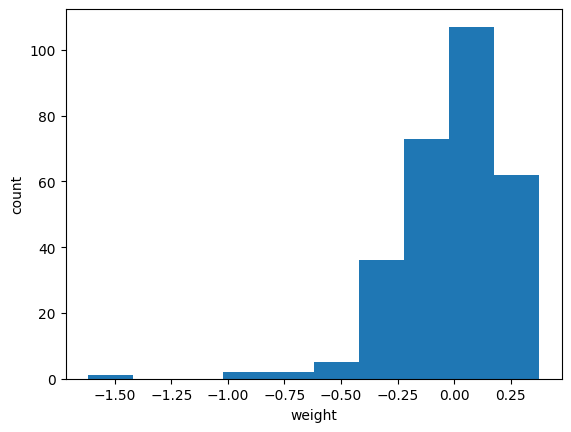

In [6]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

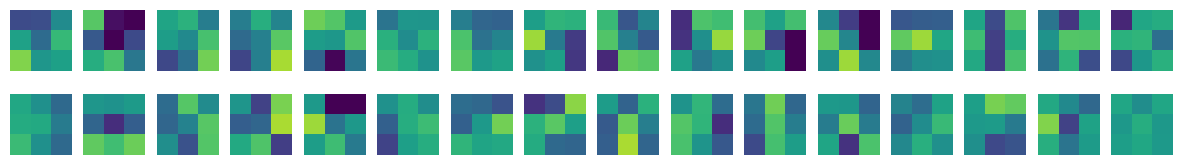

In [7]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [8]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Input(shape=(28, 28, 1)))
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))

In [9]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [10]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0024996267 0.08253009


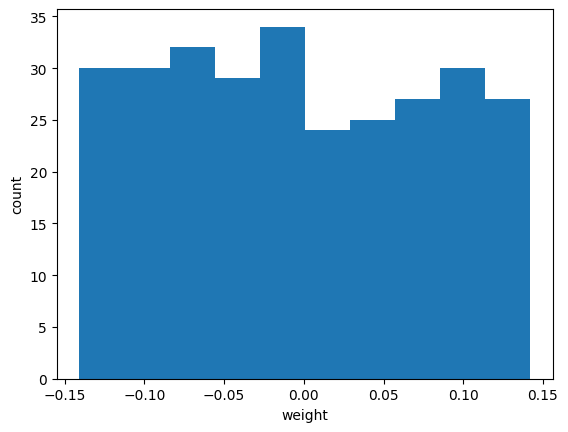

In [11]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

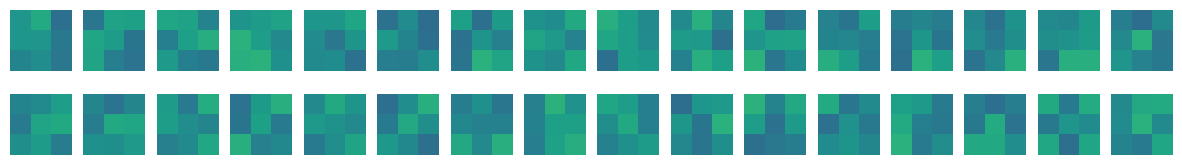

In [12]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

함수형 API

In [13]:
inputs = keras.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation='relu')
dense2 = keras.layers.Dense(10, activation='softmax')

In [14]:
hidden = dense1(inputs)

In [15]:
outputs = dense2(hidden)

In [16]:
func_model = keras.Model(inputs, outputs)

In [17]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=input_layer_2>]


In [18]:
conv_acti = keras.Model(model.inputs[0], model.layers[0].output)

특성 맵 시각화

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


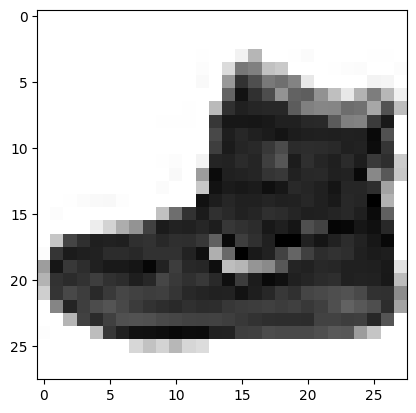

In [19]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [20]:
ankle_boot = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


In [22]:
print(feature_maps.shape)

(1, 28, 28, 32)


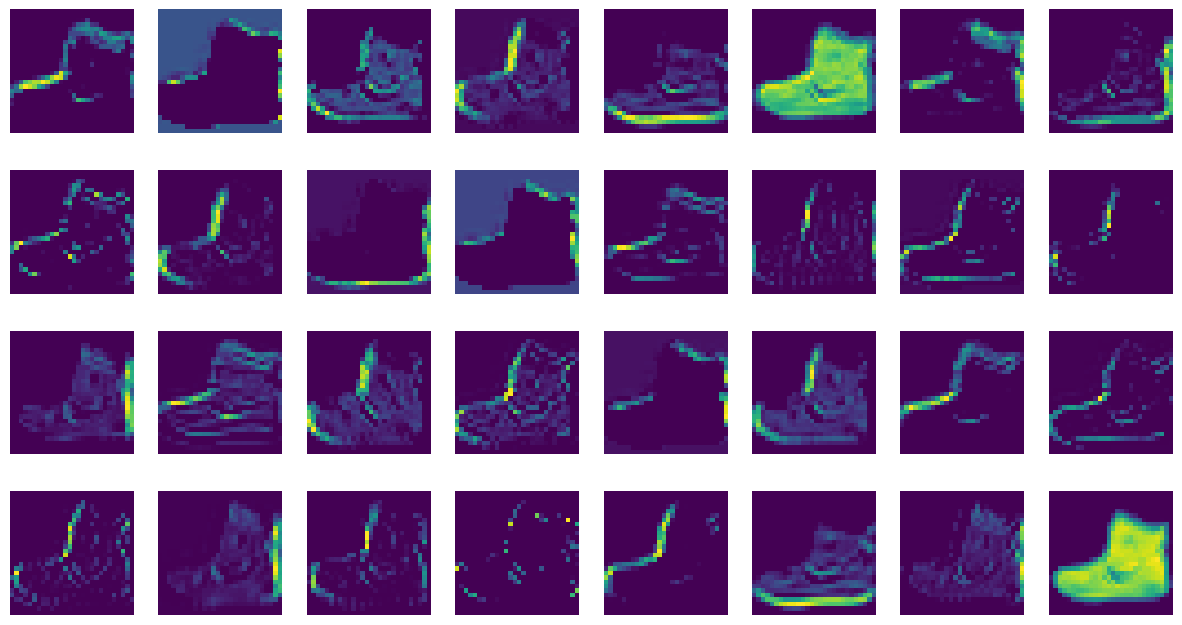

In [23]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i, j].axis('off')
plt.show()

In [24]:
conv2_acti = keras.Model(model.inputs[0], model.layers[2].output)

In [25]:
feature_maps = conv2_acti.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


In [27]:
print(feature_maps.shape)

(1, 14, 14, 64)


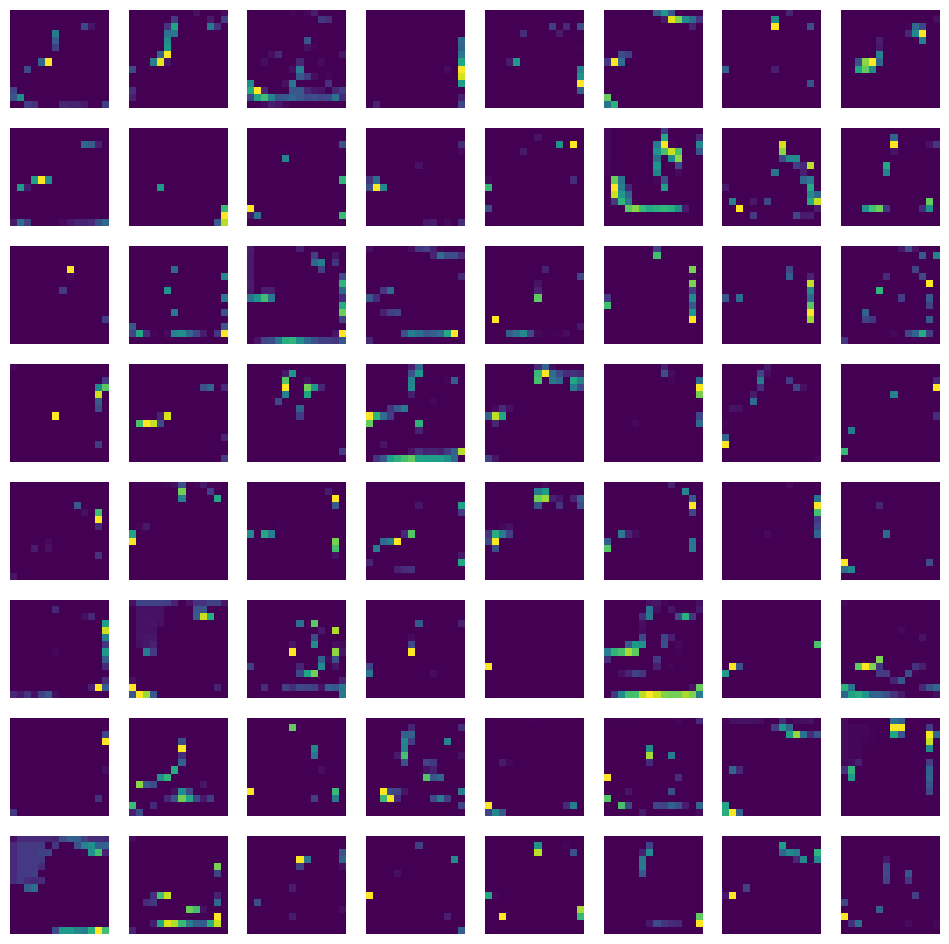

In [30]:
fir, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i, j].axis('off')
plt.show()